In [1]:
import pandas as pd

df = pd.read_json("trainer_state-t5-base.json")

In [9]:
df['log_history']

0     {'epoch': 1.0, 'learning_rate': 1.950166112956...
1     {'epoch': 1.0, 'eval_bleu': 50.8572, 'eval_gen...
2     {'epoch': 2.0, 'learning_rate': 1.900166112956...
3     {'epoch': 2.0, 'eval_bleu': 51.9674, 'eval_gen...
4     {'epoch': 3.0, 'learning_rate': 1.850166112956...
                            ...                        
73    {'epoch': 37.0, 'eval_bleu': 52.2456, 'eval_ge...
74    {'epoch': 38.0, 'learning_rate': 1.00830564784...
75    {'epoch': 38.0, 'eval_bleu': 52.157, 'eval_gen...
76    {'epoch': 39.0, 'learning_rate': 5.08305647840...
77    {'epoch': 39.0, 'eval_bleu': 52.1784, 'eval_ge...
Name: log_history, Length: 78, dtype: object

In [2]:
epochs = []
eval_bleu = []
eval_loss = []
train_loss = []
for log in df['log_history']:
    epochs.append(int(log['epoch']))
    if 'eval_bleu' in log:
        eval_bleu.append(log['eval_bleu'])
    if 'eval_loss' in log:
        eval_loss.append(log['eval_loss'])
    if 'loss' in log:
        train_loss.append(log['loss'])

In [3]:
len(epochs)

78

In [4]:
epochs = list(set(epochs))
len(epochs)

39

In [5]:
max(eval_bleu)

53.667

In [6]:
min(train_loss)

0.21760000000000002

In [7]:
min(eval_loss)

0.41620922088623

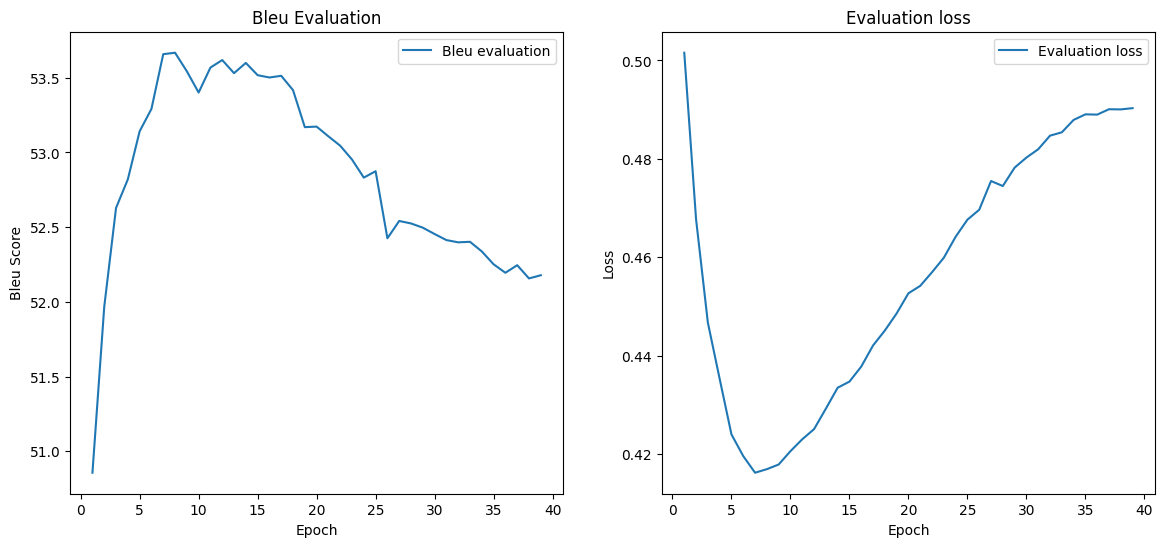

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# epochs vs eval_blue
ax[0].plot(epochs, eval_bleu, label="Bleu evaluation")
ax[0].set_title("Bleu Evaluation")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Bleu Score")
ax[0].legend()

## epochs vs eval_loss
ax[1].plot(epochs, eval_loss, label="Evaluation loss" )
ax[1].set_title("Evaluation loss")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].legend()

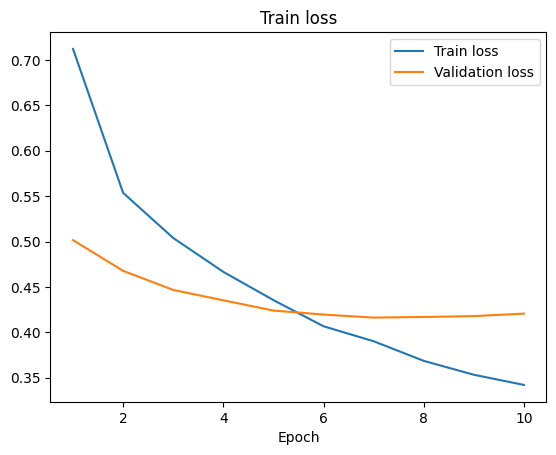

In [14]:
tl = train_loss[:10]
el = eval_loss[:10]
plt.plot(epochs, tl, label="Train loss")
plt.plot(epochs, el, label="Validation loss")
plt.title("Train loss")
plt.xlabel("Epoch")
# plt.ylabel("Train loss")
plt.legend()

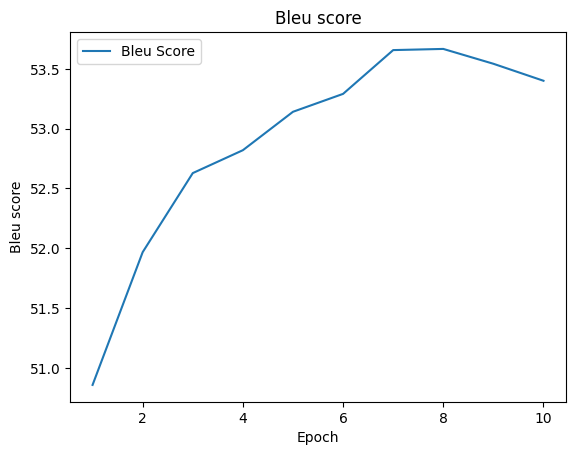

In [12]:
# Bleu Score
eval_bleu = eval_bleu[:10]
# epochs = epochs[:20]
epochs = epochs[:10]
plt.plot(epochs, eval_bleu, label="Bleu Score")
plt.title("Bleu score")
plt.xlabel("Epoch")
plt.ylabel("Bleu score")
plt.legend()